# VAE生成模型一MNIST


In [1]:
!pip install --upgrade accelerate


  Attempting uninstall: accelerate
    Found existing installation: accelerate 1.3.0
    Uninstalling accelerate-1.3.0:
      Successfully uninstalled accelerate-1.3.0


DEPRECATION: Loading egg at c:\users\glanb\anaconda3\lib\site-packages\fonttools-4.53.1-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\glanb\anaconda3\lib\site-packages\mefamo_mediapipefacemocap-0.1-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from accelerate import Accelerator

# Check CUDA available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# define VAE encoder
class VAEEncoder(nn.Module):
    def __init__(self, input_size, hidden_size, latent_size):
        super().__init__()
        self.latent_size = latent_size
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, latent_size * 2)  # 生成 mean 和 log_var

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        mu, log_var = x.split(self.latent_size, dim=1)
        return mu, log_var

# define VAR Decoder
class VAEDecoder(nn.Module):
    def __init__(self, latent_size, hidden_size, output_size):
        super().__init__()
        self.fc1 = nn.Linear(latent_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))  # 适用于 BCE
        return x

# VAE
class VAE(nn.Module):
    def __init__(self, input_size, hidden_size, latent_size):
        super().__init__()
        self.encoder = VAEEncoder(input_size, hidden_size, latent_size)
        self.decoder = VAEDecoder(latent_size, hidden_size, input_size)

    def forward(self, x):
        mu, log_var = self.encoder(x)
        std = torch.exp(0.5 * log_var)
        eps = torch.randn_like(std)
        z = mu + std * eps
        recon = self.decoder(z)
        return recon, mu, log_var


import error: No module named 'triton'
Using device: cuda




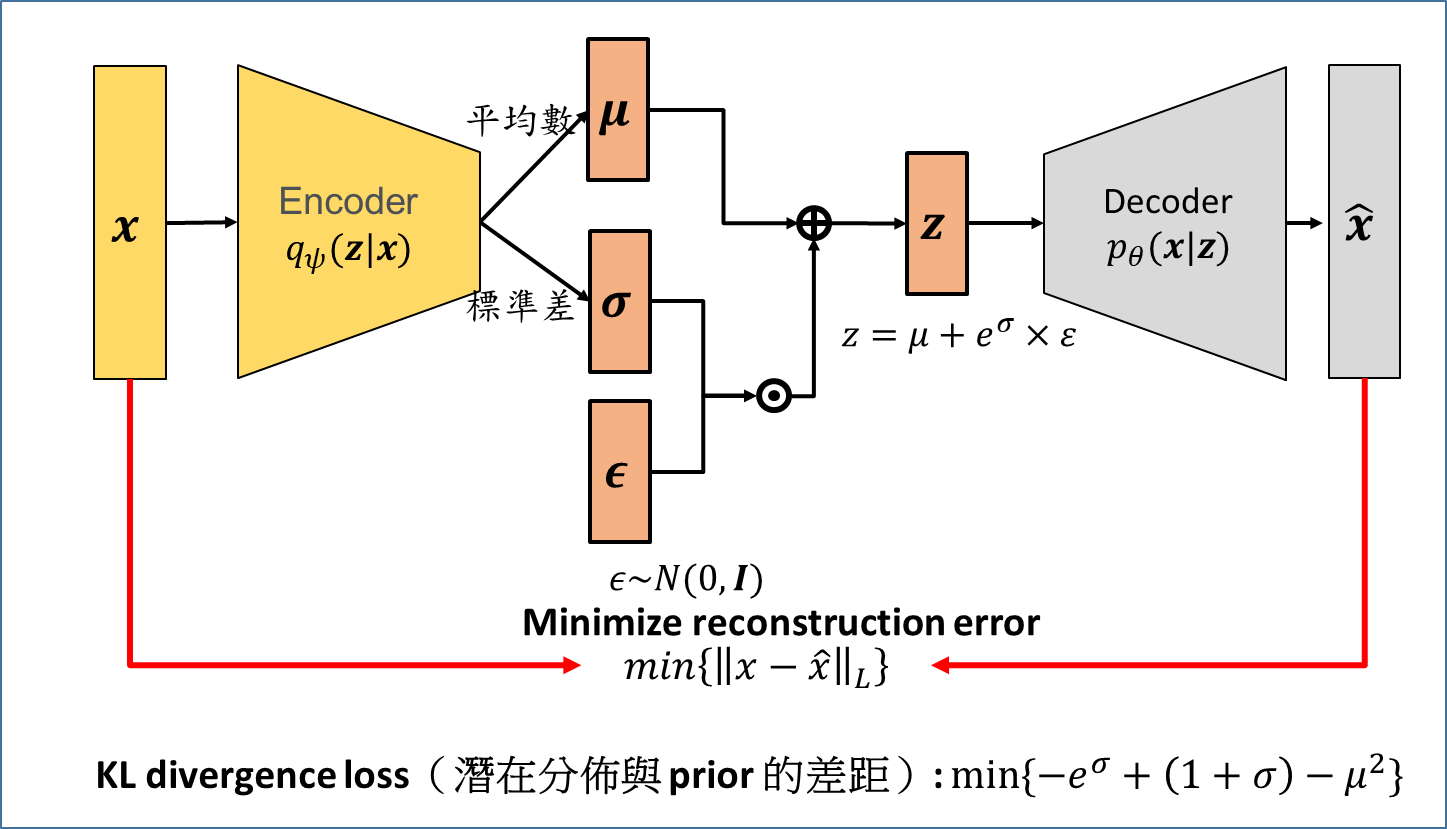

In [3]:

# loss
def vae_loss(recon, x, mu, log_var):
    recon_loss = nn.BCELoss(reduction='sum')(recon, x)
    kl_loss = -0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp())
    return recon_loss + kl_loss

C:\Users\glanb\AppData\Local\Temp\ipykernel_2352\743269736.py:12: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('vae.pth'))


Epoch 1 loss: 102.4798


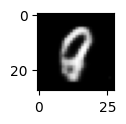

Epoch 2 loss: 102.4401
Epoch 3 loss: 102.4524
Epoch 4 loss: 102.4289
Epoch 5 loss: 102.4113
Epoch 6 loss: 102.4293


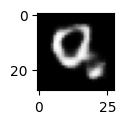

Epoch 7 loss: 102.3744
Epoch 8 loss: 102.4165
Epoch 9 loss: 102.3613
Epoch 10 loss: 102.3411
Epoch 11 loss: 102.3333


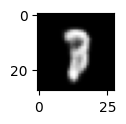

Epoch 12 loss: 102.3307
Epoch 13 loss: 102.3167
Epoch 14 loss: 102.3415
Epoch 15 loss: 102.2882
Epoch 16 loss: 102.2378


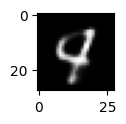

Epoch 17 loss: 102.2805
Epoch 18 loss: 102.2572
Epoch 19 loss: 102.2624
Epoch 20 loss: 102.2343
Epoch 21 loss: 102.2662


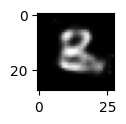

Epoch 22 loss: 102.2389
Epoch 23 loss: 102.2012
Epoch 24 loss: 102.2050
Epoch 25 loss: 102.1637
Epoch 26 loss: 102.2191


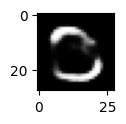

Epoch 27 loss: 102.1962
Epoch 28 loss: 102.1327
Epoch 29 loss: 102.1469
Epoch 30 loss: 102.2076
Epoch 31 loss: 102.1440


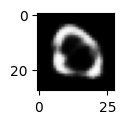

Epoch 32 loss: 102.1560
Epoch 33 loss: 102.1146
Epoch 34 loss: 102.1229
Epoch 35 loss: 102.1124
Epoch 36 loss: 102.1094


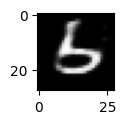

Epoch 37 loss: 102.0605
Epoch 38 loss: 102.0966
Epoch 39 loss: 102.0934
Epoch 40 loss: 102.0866
Epoch 41 loss: 102.0476


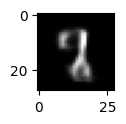

Epoch 42 loss: 102.0700
Epoch 43 loss: 102.0149
Epoch 44 loss: 102.0454
Epoch 45 loss: 101.9924
Epoch 46 loss: 101.9856


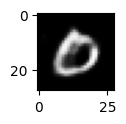

Epoch 47 loss: 102.0274
Epoch 48 loss: 101.9814
Epoch 49 loss: 101.9746
Epoch 50 loss: 101.9710
Epoch 51 loss: 101.9885


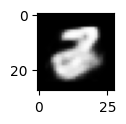

Epoch 52 loss: 101.9874
Epoch 53 loss: 101.9236
Epoch 54 loss: 101.9433
Epoch 55 loss: 101.9078
Epoch 56 loss: 101.9332


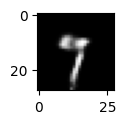

Epoch 57 loss: 101.9449
Epoch 58 loss: 101.8845
Epoch 59 loss: 101.9134
Epoch 60 loss: 101.9427
Epoch 61 loss: 101.9257


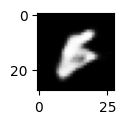

Epoch 62 loss: 101.9210
Epoch 63 loss: 101.9064
Epoch 64 loss: 101.8774
Epoch 65 loss: 101.8748
Epoch 66 loss: 101.8540


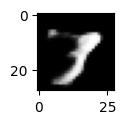

Epoch 67 loss: 101.8462
Epoch 68 loss: 101.8539
Epoch 69 loss: 101.8447
Epoch 70 loss: 101.8573
Epoch 71 loss: 101.8340


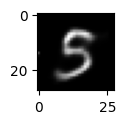

Epoch 72 loss: 101.8388
Epoch 73 loss: 101.7860
Epoch 74 loss: 101.8366
Epoch 75 loss: 101.8061
Epoch 76 loss: 101.7888


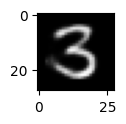

Epoch 77 loss: 101.8045
Epoch 78 loss: 101.7677
Epoch 79 loss: 101.7936
Epoch 80 loss: 101.7808
Epoch 81 loss: 101.7345


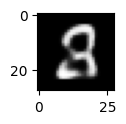

Epoch 82 loss: 101.7445
Epoch 83 loss: 101.7730
Epoch 84 loss: 101.7404
Epoch 85 loss: 101.7627
Epoch 86 loss: 101.7494


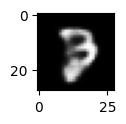

Epoch 87 loss: 101.7121
Epoch 88 loss: 101.7462
Epoch 89 loss: 101.7235
Epoch 90 loss: 101.6552
Epoch 91 loss: 101.7027


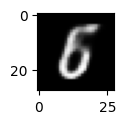

Epoch 92 loss: 101.6971
Epoch 93 loss: 101.7223
Epoch 94 loss: 101.6997
Epoch 95 loss: 101.6826
Epoch 96 loss: 101.6747


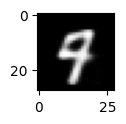

Epoch 97 loss: 101.6504
Epoch 98 loss: 101.6743
Epoch 99 loss: 101.6639
Epoch 100 loss: 101.6444


In [5]:

batch_size = 64
lr = 1e-3
num_epochs = 100
input_size = 28 * 28
hidden_size = 256
latent_size = 64
flag_pre_train = 1

model = VAE(input_size, hidden_size, latent_size).to(device)  # move to CUDA

if flag_pre_train:
    model.load_state_dict(torch.load('vae.pth'))

# dataset
transform = transforms.Compose([
    transforms.ToTensor()  #
])
mnist = datasets.MNIST(root='.', download=True, transform=transform)
data_loader = DataLoader(mnist, batch_size=batch_size, shuffle=True)


optimizer = optim.Adam(model.parameters(), lr=lr)


accelerator = Accelerator()
model, optimizer, training_dataloader = accelerator.prepare(
     model, optimizer, data_loader)


# 训练 VAE 模型
for epoch in range(num_epochs):
    epoch_loss = 0.0
    model.train()
    for x, _ in data_loader:
        optimizer.zero_grad()
        x = x.view(-1, input_size).to(device)  #  move to CUDA
        recon, mu, log_var = model(x)
        loss = vae_loss(recon, x, mu, log_var)
        # loss.backward()
        accelerator.backward(loss)
        optimizer.step()
        epoch_loss += loss.item()
    print(f'Epoch {epoch+1} loss: {epoch_loss / len(mnist):.4f}')              

    if epoch %5 ==0:
        model.eval()
        # 使用 VAE 生成图像
        with torch.no_grad():
            z = torch.randn(1, latent_size).to(device)  # 生成向量放到 CUDA
            image = model.decoder(z).view(28, 28).cpu().detach().numpy()  # 转换到 CPU 再转换 NumPy
            plt.figure(figsize=(1,1))
            plt.imshow(image, cmap='gray')
            plt.show()

# 保存模型
torch.save(model.state_dict(), 'vae.pth')


# Inference 


C:\Users\glanb\AppData\Local\Temp\ipykernel_2352\3243451078.py:18: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('vae.pth'))


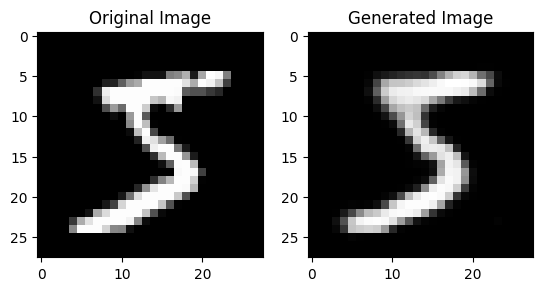

In [6]:
# generate.py 
import torch
import matplotlib.pyplot as plt



batch_size = 64
lr = 1e-3
num_epochs = 20
input_size = 28 * 28
hidden_size = 256
latent_size = 64

model = VAE(input_size, hidden_size, latent_size).to(device)  # move to CUDA


# 加载已训练好的模型
model.load_state_dict(torch.load('vae.pth'))
model.eval()

# 选择mnist的样本图像 
sample_image = mnist[0][0].to(device)

# 使用 VAE 的编码器将样本图像编码为 latent variables
mu, log_var = model.encoder(sample_image.view(-1, input_size))

# 将生成的 latent variables 作为输入传递给 VAE 的解码器，生成数字图像
generated_image = model.decoder(mu).view(28, 28)

# 显示原始图像和生成的图像
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(sample_image.view(28, 28).cpu().numpy(), cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Generated Image')
plt.imshow(generated_image.detach().cpu().numpy(), cmap='gray')
plt.show()


In [7]:
import numpy as np
data_feature = np.zeros((len(mnist),64))
label = np.zeros(len(mnist))
for i, data_minst in enumerate(mnist):
    label[i] = data_minst[1]
    # 选择mnist的样本图像 
    sample_image = data_minst[0].to(device)

    # 使用 VAE 的编码器将样本图像编码为 latent variables
    mu, log_var = model.encoder(sample_image.view(-1, input_size))
    data_feature[i,:]=mu.detach().cpu().numpy()
    


In [8]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=2)
# data_feature_t = pca.fit_transform(data_feature)

from sklearn.manifold import TSNE
data_feature_tsne = TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity=3).fit_transform(data_feature)
print(data_feature_tsne.shape)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
data_feature_lda = lda.fit(data_feature, label).transform(data_feature)
print(data_feature_lda.shape)


(60000, 2)
(60000, 2)


In [9]:
from sklearn.neighbors import KNeighborsRegressor

# 训练一个 KNN 回归模型
knn = KNeighborsRegressor(n_neighbors=5, weights='distance')
knn.fit(data_feature_tsne, data_feature)

# 预测恢复的高维数据
data_feature_recovered = knn.predict(data_feature_tsne)

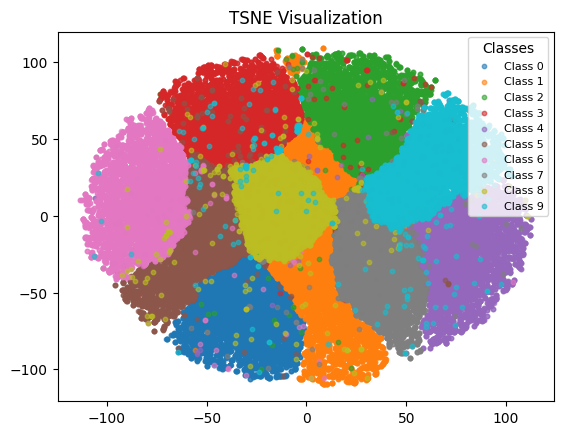

In [10]:
import matplotlib.pyplot as plt

colors = plt.cm.tab10(np.linspace(0, 1, 10))  # 10种类别颜色

fig, ax = plt.subplots()

# 1. **用 scatter 绘制不同颜色的点**
for i in range(10):
    pos = label == i  # 找到属于当前类别的点
    ax.scatter(data_feature_tsne[pos,0], data_feature_tsne[pos,1], color=colors[i], label=f'Class {i}', alpha=0.6, s=10)

ax.legend(title="Classes", loc="upper right", fontsize=8)

plt.title('TSNE Visualization')
plt.show()




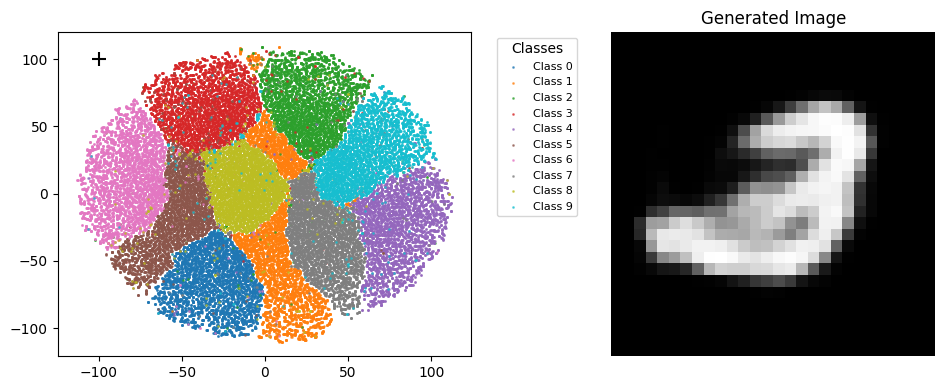

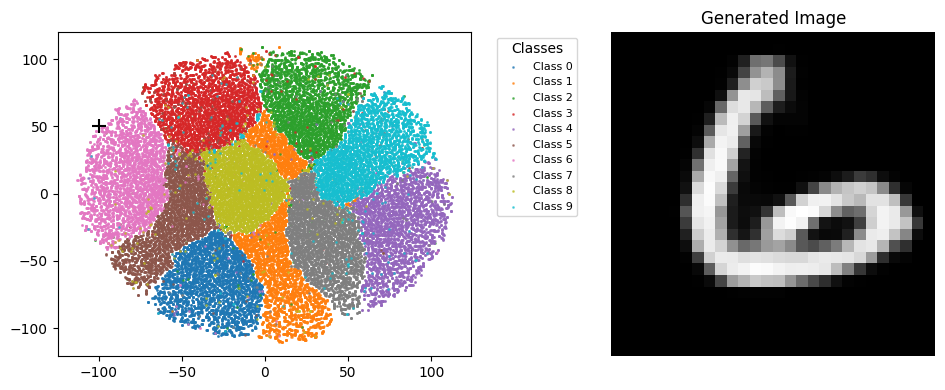

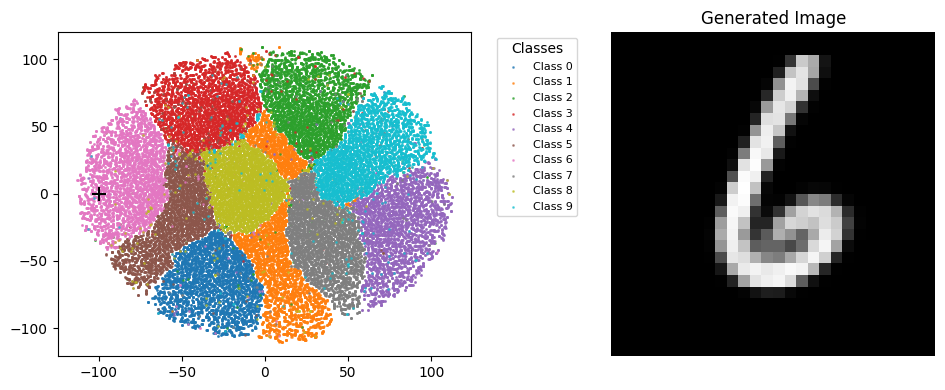

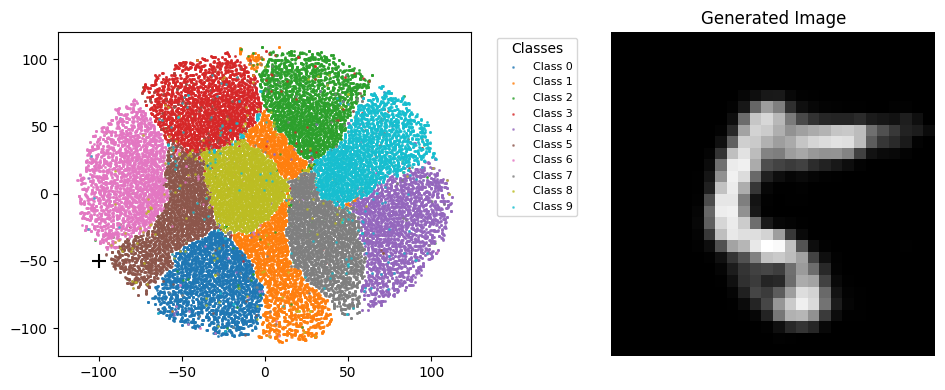

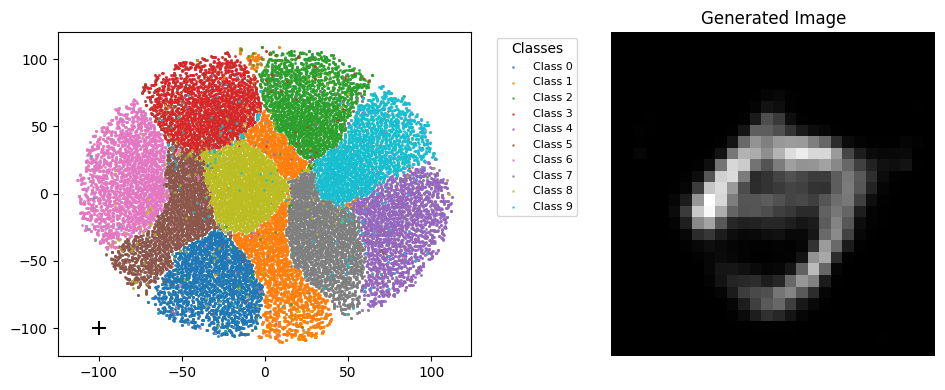

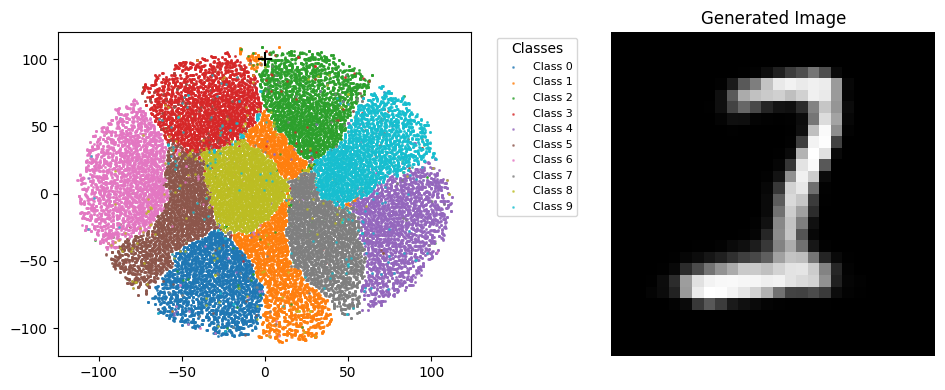

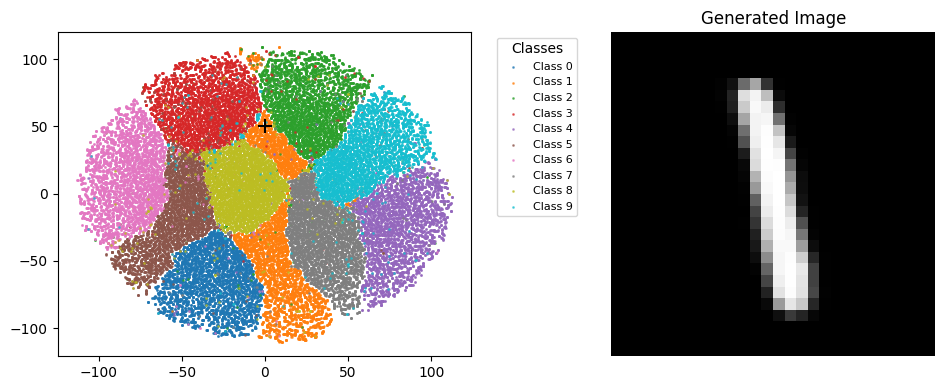

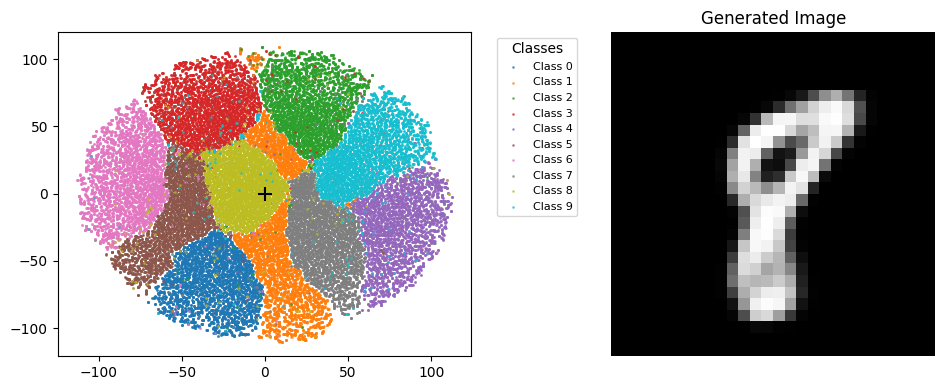

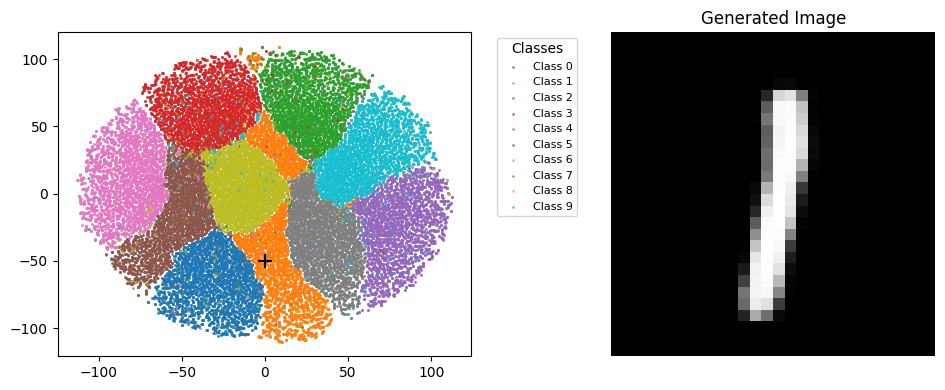

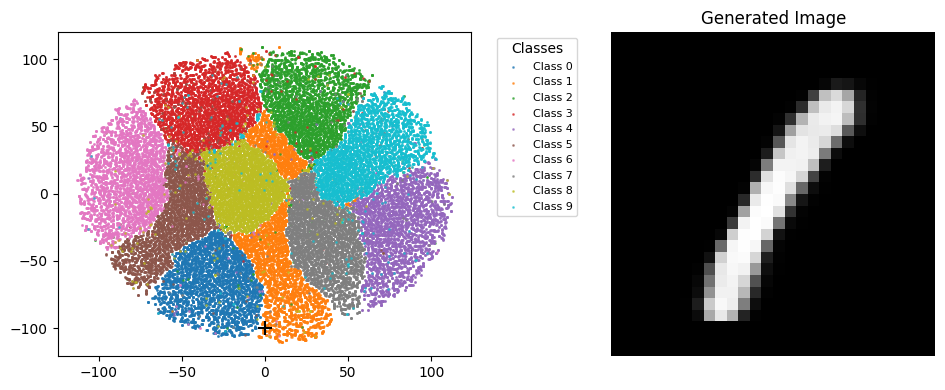

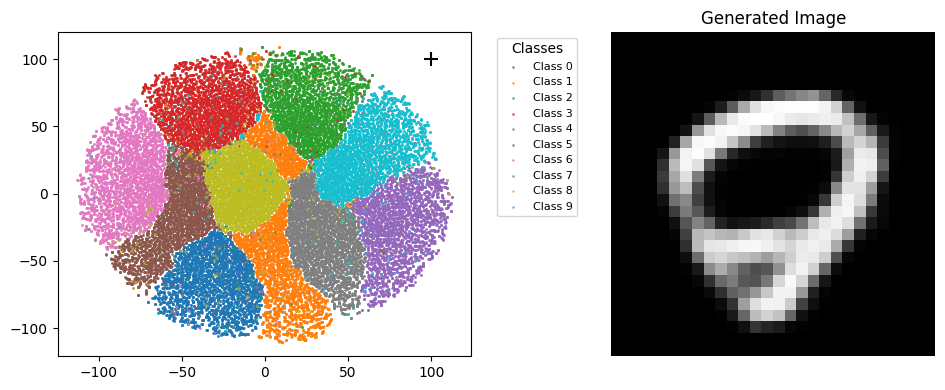

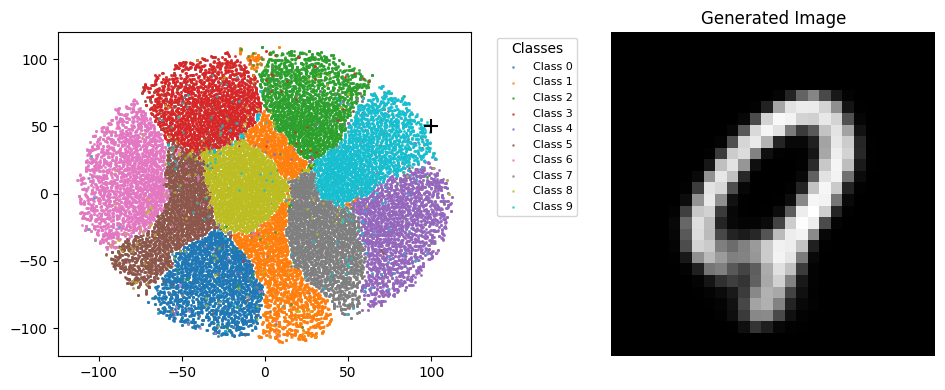

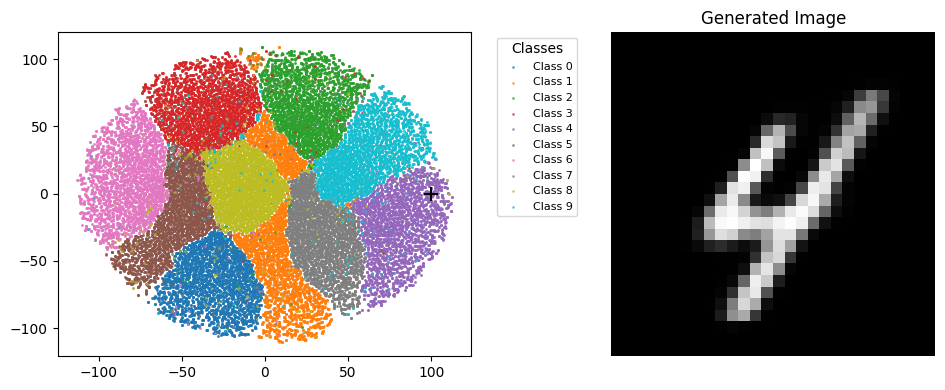

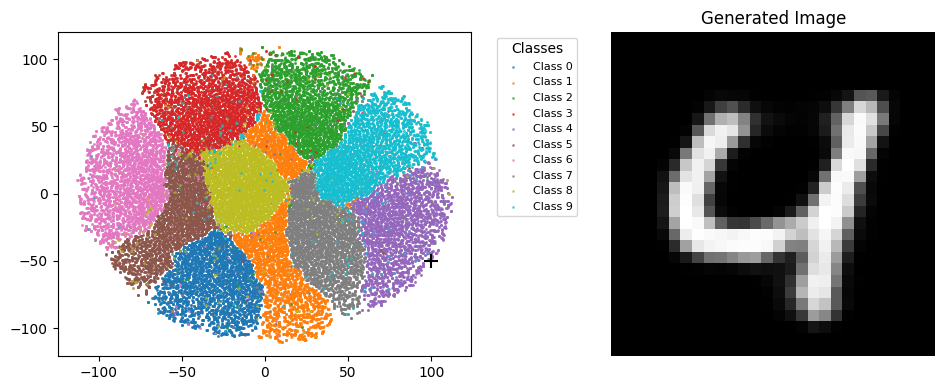

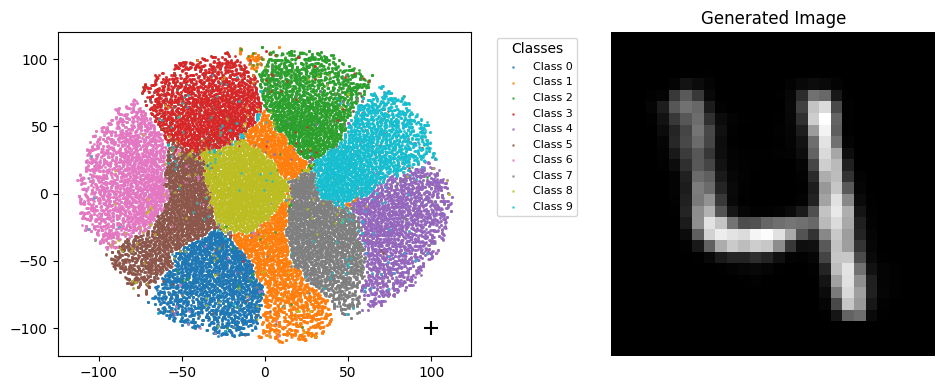

In [17]:
colors = plt.cm.tab10(np.linspace(0, 1, 10))  # 10种类别颜色

data_samples = np.array([[-100,100],
                         [-100,50],
                         [-100,0],
                         [-100,-50],
                         [-100,-100],
                         [-0,100],
                         [-0,50],
                         [-0,0],
                         [-0,-50],
                         [-0,-100],
                         [100,100],
                         [100,50],
                         [100,0],
                         [100,-50],
                         [100,-100]])

for data_sample in data_samples:
    # data_feature_recovered = knn.predict(np.array([[-100,100]]))
    data_feature_recovered = knn.predict(np.array([data_sample]))
    data_feature_recovered=torch.FloatTensor(data_feature_recovered).to(device)
    generated_image = model.decoder(data_feature_recovered).view(28, 28)
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    # 1. **用 scatter 绘制不同颜色的点**
    for i in range(10):
        pos = label == i  # 找到属于当前类别的点
        plt.scatter(data_feature_tsne[pos,0], data_feature_tsne[pos,1], color=colors[i], label=f'Class {i}', alpha=0.6, s=1)
    # plt.legend(title="Classes", loc="upper right", fontsize=8)
    plt.legend(title="Classes", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=8)
    plt.scatter(data_sample[0], data_sample[1], color=[0,0,0], s=100, marker='+')
    plt.subplot(1,2,2)
    plt.title('Generated Image')
    plt.imshow(generated_image.detach().cpu().numpy(), cmap='gray')
    plt.axis('off')
    plt.tight_layout()  # 自动调整子图布局，避免重叠
    plt.show()